# Installation

In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j


import os
import sys

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
39 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

# Spark
Apache Spark is an open-source unified analytics engine for large-scale data processing.

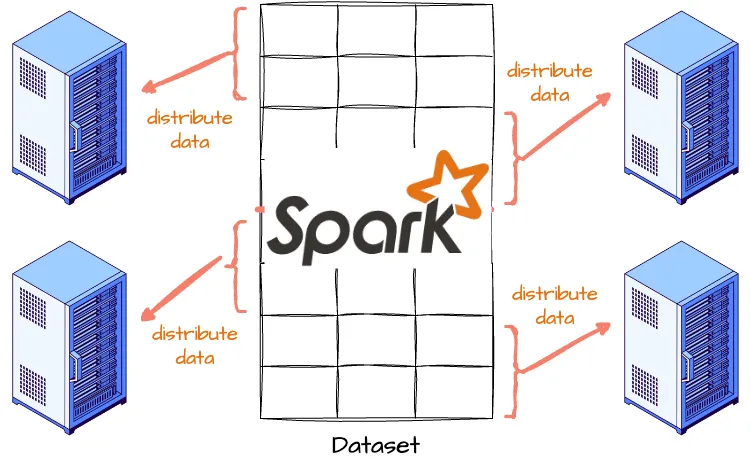

In [ ]:
from IPython.display import Image, display

display(Image(filename='/content/distributed-system-spark.png'))

#Why use Spark?

Speed: It does in-memory computation (keeps data in RAM), reducing expensive disk reads/writes.

Ease of Use: Simple APIs in Python, Java, Scala, and R.

Fault Tolerant: Automatically recovers lost data using RDD Lineage (recomputes missing parts).

Scalability: Works on small laptop clusters to thousands of servers in a cloud and can handle petabytes of data.

#RDD - Resilient Distributed Datasets
RDDs are immutable, distributed collections of objects that can be processed in parallel. They have the following key characteristics:

1. Resilient: Fault-tolerant with the ability to recompute missing or damaged partitions due to node failures.

2. Distributed: Data is distributed across multiple nodes in a cluster.

3. Dataset: A collection of partitioned data with primitive values or values of defined types.

4. Immutable: Cannot be changed once created; any modification creates a new RDD.

5. Lazy Evaluation: Data transformations are not executed until an action is triggered.

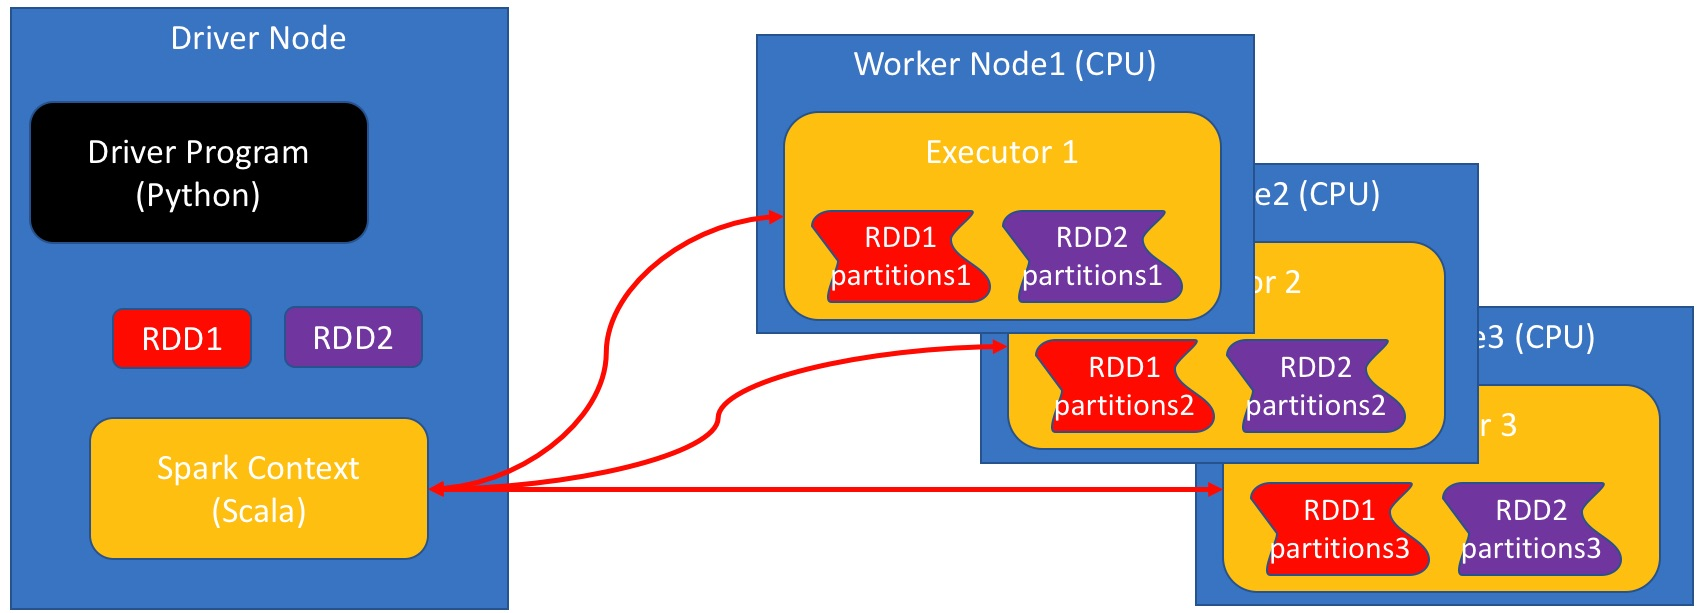

In [ ]:
from IPython.display import Image, display

display(Image(filename='/content/sparkRDDArch.jpeg'))

In [ ]:
import pyspark

from pyspark.sql import SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark = (
        SparkSession
       .builder
       .appName("Spark Tutorial")
       .getOrCreate()
      )

spark

In [ ]:
sc = spark.sparkContext

# Create RDD

In [ ]:
# Our sample book dataset
books_data = [
    ("Python Programming", 2020, "John Doe", 45.99),
    ("Data Science Basics", 2019, "Jane Smith", 39.99),
    ("Spark in Action", 2021, "Bob Johnson", 49.99),
    ("Python for Beginners", 2020, "John Doe", 29.99),
    ("Big Data Analytics", 2021, "Jane Smith", 59.99)
]

books_rdd = sc.parallelize(books_data, numSlices=2)

print("Number of partitions:", books_rdd.getNumPartitions())
print("First element:", books_rdd.first())

Number of partitions: 2
First element: ('Python Programming', 2020, 'John Doe', 45.99)


# Operations on RDD: Actions
Actions trigger computation and return values to the driver program or write data to external storage.

Examples include: collect, count, first etc.


In [ ]:
# Actions
books_rdd.count()

5

In [ ]:
books_rdd.collect()

[('Python Programming', 2020, 'John Doe', 45.99),
 ('Data Science Basics', 2019, 'Jane Smith', 39.99),
 ('Spark in Action', 2021, 'Bob Johnson', 49.99),
 ('Python for Beginners', 2020, 'John Doe', 29.99),
 ('Big Data Analytics', 2021, 'Jane Smith', 59.99)]

In [ ]:
books_rdd.first()

('Python Programming', 2020, 'John Doe', 45.99)

In [ ]:
books_rdd.take(2)

[('Python Programming', 2020, 'John Doe', 45.99),
 ('Data Science Basics', 2019, 'Jane Smith', 39.99)]

# Operations on RDD: Transformations
Transformations create a new RDD from an existing one. They are lazy operations that define a new RDD without immediately computing it.

Examples include: map. filter, flatMap

In [ ]:
# Transformations
titles_rdd = books_rdd.map(lambda x: x[0] + " book")
print("Titles:", titles_rdd.collect())

Titles: ['Python Programming book', 'Data Science Basics book', 'Spark in Action book', 'Python for Beginners book', 'Big Data Analytics book']


In [ ]:
books_2020 = books_rdd.filter(lambda x: x[1] == 2020)
print("2020 books:", books_2020.collect())

2020 books: [('Python Programming', 2020, 'John Doe', 45.99), ('Python for Beginners', 2020, 'John Doe', 29.99)]


In [ ]:
words_rdd = titles_rdd.flatMap(lambda x: x.split())
# Map output - [['Python', 'Programming', 'book'], ['Data', 'Science', 'Basics', 'book']]
print("Words:", words_rdd.collect())

Words: ['Python', 'Programming', 'book', 'Data', 'Science', 'Basics', 'book', 'Spark', 'in', 'Action', 'book', 'Python', 'for', 'Beginners', 'book', 'Big', 'Data', 'Analytics', 'book']


In [ ]:
authors = books_rdd.map(lambda x: x[2]).distinct()
print("Authors:", authors.collect())

Authors: ['Jane Smith', 'John Doe', 'Bob Johnson']


In [ ]:
#Lazy Evaluation
numbers = sc.textFile("numbers.txt")
mapNums = numbers.map(lambda x: float(x) * 10)
filterNums = mapNums.filter(lambda x: x < 50)
filterNums

    (2) PythonRDD[99] at RDD at PythonRDD.scala:53 []
     |  numbers.txt MapPartitionsRDD[98] at textFile at NativeMethodAccessorImpl.java:0 []
     |  numbers.txt HadoopRDD[97] at textFile at NativeMethodAccessorImpl.java:0 []


In [ ]:
filterNums.collect()

# Key Value RDD's

In [ ]:
# Create key-value pairs (author, price)
author_price_rdd = books_rdd.map(lambda x: (x[2], x[3]))
author_price_rdd.collect()

[('John Doe', 45.99),
 ('Jane Smith', 39.99),
 ('Bob Johnson', 49.99),
 ('John Doe', 29.99),
 ('Jane Smith', 59.99)]

In [ ]:
# GroupByKey
author_books = author_price_rdd.groupByKey()
print("Books by author:", author_books.mapValues(list).collect())

Books by author: [('Jane Smith', [39.99, 59.99]), ('John Doe', [45.99, 29.99]), ('Bob Johnson', [49.99])]


In [ ]:
# ReduceByKey
total_by_author = author_price_rdd.reduceByKey(lambda x, y: x + y)
print("Total price by author:", total_by_author.collect())

Total price by author: [('Jane Smith', 99.98), ('John Doe', 75.98), ('Bob Johnson', 49.99)]


In [ ]:
#sortByKey
sorted_books = total_by_author.sortByKey()
print("Sorted Books:", sorted_books.collect())

Sorted Books: [('Bob Johnson', 49.99), ('Jane Smith', 99.98), ('John Doe', 75.98)]


In [ ]:
# Create another RDD for author ratings
author_ratings = sc.parallelize([
    ("John Doe", 4.5),
    ("Jane Smith", 4.8),
    ("Bob Johnson", 4.2)
])

# Join RDDs
joined_data = author_price_rdd.join(author_ratings)
print("Joined data:", joined_data.collect())

Joined data: [('Jane Smith', (39.99, 4.8)), ('Jane Smith', (59.99, 4.8)), ('John Doe', (45.99, 4.5)), ('John Doe', (29.99, 4.5)), ('Bob Johnson', (49.99, 4.2))]
